env : gpu

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import csv
import cv2

warnings.filterwarnings("ignore")

xlsx -> csv

In [2]:
# pip install xrld & openpyxl

csv_file = pd.read_excel("/home/john/network/RETFound/data/0131.xlsx")

In [3]:
csv_file.to_csv("/home/john/network/RETFound/data/csv/0131.csv",index=False)

In [4]:
# outcome 
dataset = pd.read_csv("0131.csv")

# Image data (num = 8208)
Fundus_File = '/home/john/network/RETFound/data/ROI'

In [5]:
dataset

,病歷號,年齡,性別,fundoscope(共做過幾次),1st fundo (date),2nd fundo (date),3rd fundo (date),4rd fundo (date),5rd fundo (date),6rd fundo (date),...,運動種類,運動頻率分/次,運動頻率次/週,衛教檢驗日期,飲食,藥物認識,運動的目的及注意事項,生病時的照顧,自我監測,指導注射技巧
0,4314535,64,1,14.0,20080415,20090210.0,20100205.0,20110419.0,20120424.0,20130618.0,...,NaN,NaN,NaN,2023/03/03,NaN,NaN,NaN,NaN,NaN,NaN
1,4069957,69,1,8.0,20051215,20150506.0,20170202.0,20171225.0,20190116.0,20200422.0,...,NaN,NaN,NaN,2023/04/12,NaN,NaN,NaN,NaN,NaN,NaN
2,4386971,71,2,3.0,20200214,20210414.0,20220801.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2023/01/17,NaN,NaN,NaN,NaN,NaN,NaN
3,4845785,53,1,3.0,20200811,20211202.0,20230119.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2023/01/18,NaN,NaN,NaN,NaN,NaN,NaN
4,4132852,60,2,4.0,20180117,20181002.0,20200226.0,20221028.0,NaN,NaN,...,NaN,NaN,NaN,2023/05/29,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,4241840,69,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2023/06/06,NaN,NaN,1.0,NaN,NaN,NaN
1303,1795454,62,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,2685764,64,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,3807636,56,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select filename & Outcome id

In [6]:
file_list = os.listdir(Fundus_File)
new_dataframe = pd.DataFrame(columns=dataset.columns)

for filename in file_list:
    start = 0

    for i in range(start,len(filename)):
        if filename[i] == '-':
            found = True
            break
    
    if found:
        match = False

        for j in range(0, len(dataset['病歷號'])):
            if filename[start:i] == str(dataset['病歷號'][j]):
                new_row = dataset.iloc[j]
                new_dataframe = new_dataframe.append(new_row,ignore_index = True)
                match = True
                
        if not match:
                    print(f"Not found : {filename[start:i]}")

new_dataframe.to_csv("/home/john/network/RETFound/data/csv/Select_patient_0131.csv",index = False)      

In [7]:
new_dataframe

,病歷號,年齡,性別,fundoscope(共做過幾次),1st fundo (date),2nd fundo (date),3rd fundo (date),4rd fundo (date),5rd fundo (date),6rd fundo (date),...,運動種類,運動頻率分/次,運動頻率次/週,衛教檢驗日期,飲食,藥物認識,運動的目的及注意事項,生病時的照顧,自我監測,指導注射技巧
0,4385815,70,2,7.0,20160713,20170802.0,20180912.0,20190918.0,20201125.0,20211223.0,...,NaN,NaN,NaN,2023/03/30,NaN,NaN,NaN,NaN,NaN,NaN
1,7093981,51,2,7.0,20151201,20170224.0,20180313.0,20190605.0,20200804.0,20211028.0,...,NaN,NaN,NaN,2023/03/23,NaN,NaN,NaN,NaN,NaN,NaN
2,4940688,60,1,5.0,20180124,20190319.0,20200908.0,20220127.0,20230201.0,NaN,...,NaN,NaN,NaN,2023/02/01,NaN,NaN,NaN,NaN,NaN,NaN
3,2310298,60,1,6.0,20180615,20190610.0,20200703.0,20211020.0,20220708.0,20230928.0,...,NaN,NaN,NaN,2023/04/07,NaN,NaN,NaN,NaN,NaN,NaN
4,4540756,72,1,5.0,20191203,20200821.0,20211102.0,20230214.0,20231107.0,NaN,...,NaN,NaN,NaN,2023/05/16,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8163,4092882,68,2,4.0,20190103,20210330.0,20230217.0,20231117.0,NaN,NaN,...,NaN,NaN,NaN,2023/05/19,NaN,NaN,NaN,NaN,NaN,NaN
8164,4161150,60,1,7.0,20160914,20170912.0,20180914.0,20200131.0,20210128.0,20220415.0,...,NaN,NaN,NaN,2023/05/12,NaN,NaN,NaN,NaN,NaN,NaN
8165,4073719,79,2,8.0,20160122,20170331.0,20180606.0,20190529.0,20200624.0,20210818.0,...,NaN,NaN,NaN,2023/04/17,NaN,NaN,NaN,NaN,NaN,NaN
8166,7096147,51,2,3.0,20211123,20220816.0,20230517.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2023/05/17,NaN,NaN,NaN,NaN,NaN,NaN


Select label

In [10]:
csv_0131 = pd.read_csv('/home/john/network/RETFound/data/csv/Select_patient_0131.csv') 

columns_keep = ['病歷號','年齡']

csv_0131 = csv_0131[columns_keep]
csv_0131 = csv_0131.rename(columns = 
                                    {'病歷號':'ID','年齡':'Age'})

In [11]:
csv_0131

,ID,Age
0,4385815,70
1,7093981,51
2,4940688,60
3,2310298,60
4,4540756,72
...,...,...
8163,4092882,68
8164,4161150,60
8165,4073719,79
8166,7096147,51


In [13]:
# Loading Fundus Images
ImageFilePath = '/home/john/network/RETFound/data/ROI'
ImageFileNames = [filename for filename in os.listdir(ImageFilePath)]

csv_0131['ID']  = ImageFileNames


In [14]:
csv_0131

,ID,Age
0,4385815-02-L-20170802.jpg,70
1,7093981-05-L-20200804.jpg,51
2,4940688-05-R-20230201.jpg,60
3,2310298-05-L-20220708.jpg,60
4,4540756-03-R-20211102.jpg,72
...,...,...
8163,4092882-01-R-20190103.jpg,68
8164,4161150-04-L-20200131.jpg,60
8165,4073719-08-R-20230710.jpg,79
8166,7096147-02-R-20220816.jpg,51


In [15]:
csv_0131["RealAge"] = ""

for i in range(len(csv_0131.ID)):
    csv_0131["RealAge"][i] = int(csv_0131["Age"][i]) - (2023 - int(csv_0131["ID"][i][-12:-8]))

In [17]:
csv_0131

,ID,Age,RealAge
0,4385815-02-L-20170802.jpg,70,64
1,7093981-05-L-20200804.jpg,51,48
2,4940688-05-R-20230201.jpg,60,60
3,2310298-05-L-20220708.jpg,60,59
4,4540756-03-R-20211102.jpg,72,70
...,...,...,...
8163,4092882-01-R-20190103.jpg,68,64
8164,4161150-04-L-20200131.jpg,60,57
8165,4073719-08-R-20230710.jpg,79,79
8166,7096147-02-R-20220816.jpg,51,50


counts

In [18]:
RealAge_counts = csv_0131['RealAge'].value_counts()
RealAge_counts

67    346
66    346
65    342
68    330
64    318
     ... 
24      8
91      6
90      6
92      4
23      2
Name: RealAge, Length: 70, dtype: int64

In [19]:
RealAge_counts = csv_0131['RealAge'].value_counts()
sort_age = RealAge_counts.sort_index()

for age, count in sort_age.items():
    print(f'Age = {age} : {count}')


Age = 23 : 2
Age = 24 : 8
Age = 25 : 12
Age = 26 : 12
Age = 27 : 10
Age = 28 : 12
Age = 29 : 12
Age = 30 : 18
Age = 31 : 10
Age = 32 : 16
Age = 33 : 14
Age = 34 : 20
Age = 35 : 20
Age = 36 : 18
Age = 37 : 26
Age = 38 : 34
Age = 39 : 30
Age = 40 : 44
Age = 41 : 44
Age = 42 : 46
Age = 43 : 50
Age = 44 : 44
Age = 45 : 67
Age = 46 : 84
Age = 47 : 84
Age = 48 : 96
Age = 49 : 103
Age = 50 : 124
Age = 51 : 150
Age = 52 : 146
Age = 53 : 162
Age = 54 : 169
Age = 55 : 190
Age = 56 : 214
Age = 57 : 220
Age = 58 : 212
Age = 59 : 238
Age = 60 : 226
Age = 61 : 270
Age = 62 : 290
Age = 63 : 314
Age = 64 : 318
Age = 65 : 342
Age = 66 : 346
Age = 67 : 346
Age = 68 : 330
Age = 69 : 300
Age = 70 : 266
Age = 71 : 224
Age = 72 : 208
Age = 73 : 163
Age = 74 : 150
Age = 75 : 148
Age = 76 : 139
Age = 77 : 136
Age = 78 : 136
Age = 79 : 134
Age = 80 : 106
Age = 81 : 96
Age = 82 : 84
Age = 83 : 61
Age = 84 : 60
Age = 85 : 58
Age = 86 : 42
Age = 87 : 40
Age = 88 : 34
Age = 89 : 24
Age = 90 : 6
Age = 91 : 6
Age = 

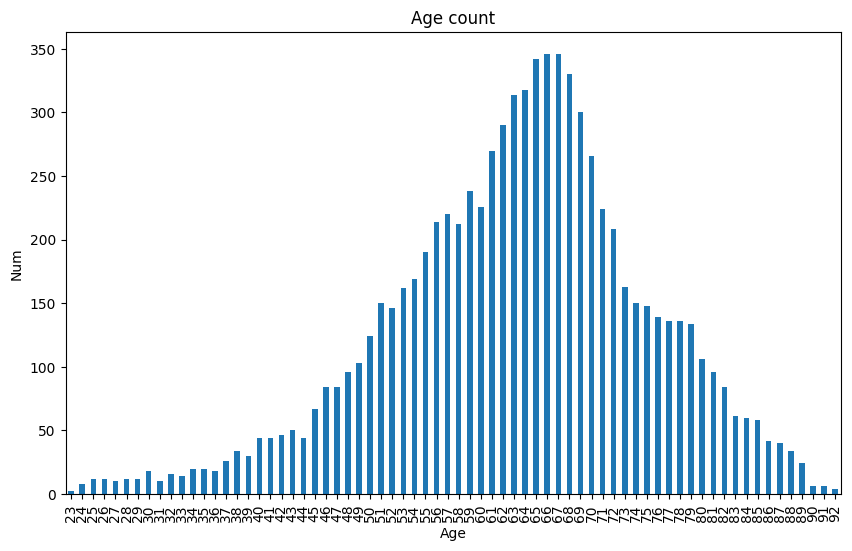

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sort_age.plot(kind='bar')

plt.title("Age count")
plt.xlabel("Age")
plt.ylabel("Num")
plt.show()

In [24]:
#check

for i in range(len(csv_0131["RealAge"])):
    if csv_0131["RealAge"][i] >= 100 or csv_0131["RealAge"][i] <=10:
        print(csv_0131["ID"][i])

In [22]:
import numpy as np

percentiles = np.percentile(csv_0131['RealAge'], [20, 40, 60, 80])

print("20%:", percentiles[0])
print("40%:", percentiles[1])
print("60%:", percentiles[2])
print("80%:", percentiles[3])


20%: 54.0
40%: 62.0
60%: 67.0
80%: 72.0
